PDF created as 'output.pdf'


/tmp/ipykernel_636649/2344766021.py:43: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(layers, fontsize=20)


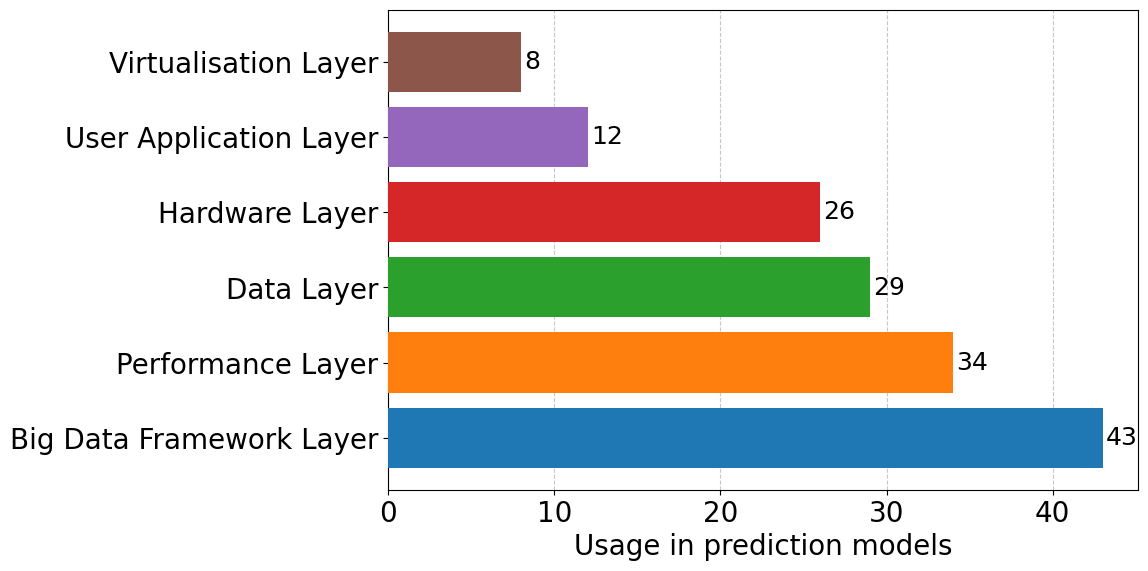

In [51]:
import matplotlib.pyplot as plt
import pandas as pd
from collections import Counter
from matplotlib.backends.backend_pdf import PdfPages

# Read the data
layers_df = pd.read_csv('data/layers.csv')

# Assign appropriate headers to the dataframe
layers_df.columns = ["Title", "Year", "Layers", "BibTex id", "Parameters"]

# Split the layers and count the occurrences of each layer
layers_df['Layers'] = layers_df['Layers'].str.split(', ')
layer_list = layers_df['Layers'].explode().tolist()
layer_counts = Counter(layer_list)

# Prepare the data for plotting
layers, occurrences = zip(*layer_counts.most_common())  # Automatically orders by occurrences

# Creating the bar plot
fig, ax = plt.subplots(figsize=(12, 6))  # Increase figure size

# Adding a grid
ax.grid(True, axis='x', linestyle='--', alpha=0.7, zorder=0)

# Create bars
bars = ax.barh(layers, occurrences, color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b'], zorder=3)

# Adding data labels without the categories and big font
for i, bar in enumerate(bars):
    ax.text(
        bar.get_width() + 1 - 0.8, 
        bar.get_y() + bar.get_height() / 2, 
        f'{occurrences[i]}', 
        va='center',
        fontsize=18
    )

# Setting labels and title
ax.set_xlabel('Usage in Prediction Models', fontsize=20)

# Increase the font size of the y-axis labels
ax.set_yticklabels(layers, fontsize=20)

# Increase the font size of the x-axis tick labels
ax.tick_params(axis='x', labelsize=20)

# Adjust layout to prevent cutoff
plt.subplots_adjust(left=0.325, right=0.95, top=0.95, bottom=0.15)

# Save the figure directly to a PDF
with PdfPages('img/layers_occurance.pdf') as pdf:
    pdf.savefig(fig)

print("PDF created as 'output.pdf'")
